
### Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
- plot histogram of ages of people
- plot no of people in each pclass on bar chart


- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead. 
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.


- plot box plot of ages of survived vs not-survived
- plot scatter plot of ages vs survived.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("titanic_filtered.csv")
print(df)

      Unnamed: 0  pclass  survived  \
0              0       1         1   
1              1       1         1   
2              2       1         0   
3              3       1         0   
4              4       1         0   
...          ...     ...       ...   
1304        1304       3         0   
1305        1305       3         0   
1306        1306       3         0   
1307        1307       3         0   
1308        1308       3         0   

                                                 name  gender      age  sibsp  \
0                       Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                      Allison, Master. Hudson Trevor    male   0.9167      1   
2                        Allison, Miss. Helen Loraine  female   2.0000      1   
3                Allison, Mr. Hudson Joshua Creighton    male  30.0000      1   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1   
...                                               ...    

1046


(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

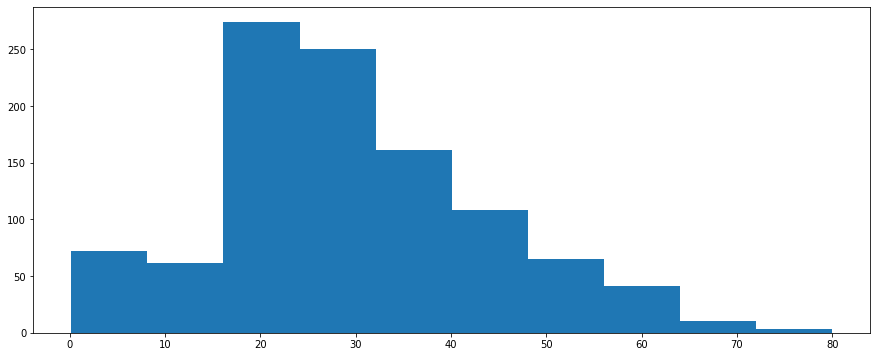

In [4]:
# plot histogram of ages of people

a=df.age.dropna()
print(len(a))
plt.figure(figsize=(15,6))
plt.hist(a)

pclass
1    323
2    277
3    709
Name: name, dtype: int64


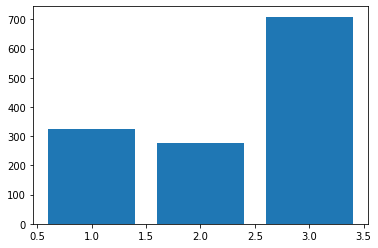

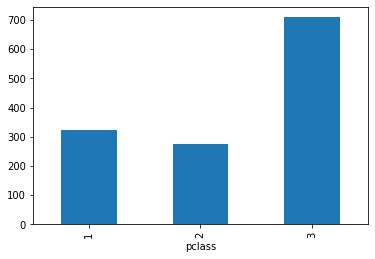

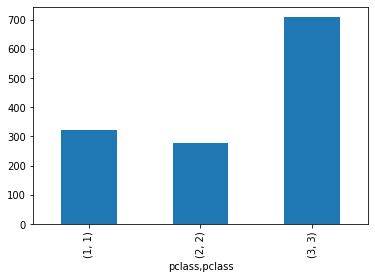

In [5]:
#plot no of people in each pclass on bar chart

grp=df.groupby(by='pclass')
y=grp.count().name
x=y.index
print(y)
plt.bar(x,y)
plt.show()
print()

grp.pclass.count().plot(kind='bar')
plt.show()
print()

grp.pclass.value_counts().plot(kind='bar')
plt.show()


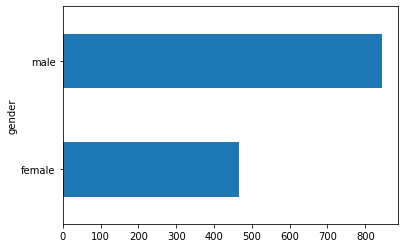

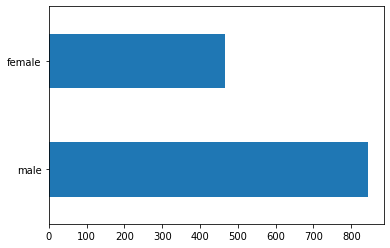

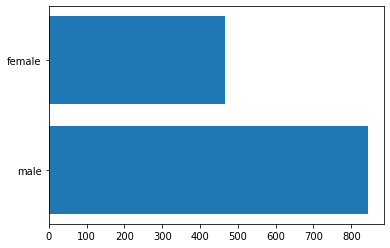

In [6]:
# plot a bar-chart depicting the ratio of males to females
grp=df.groupby(by='gender')
#print(grp.count())
grp.name.count().plot(kind='barh')
plt.show()
print()

df.gender.value_counts().plot(kind='barh')
plt.show()
print()

y=df.gender.value_counts()
plt.barh(y.index,y.values)
plt.show()
print()


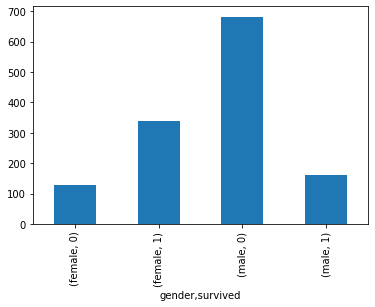

In [7]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.

grp=df.groupby(by=['gender','survived'])
#print(grp.count())

grp.gender.count().plot(kind='bar')
plt.show()
print()



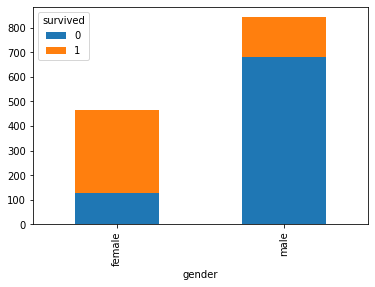

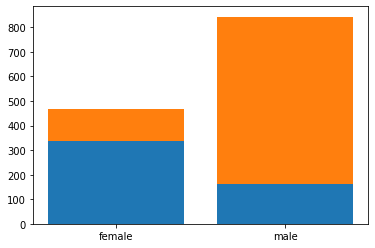

In [8]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.

#method1 with stacked=true
df.groupby(by=['gender','survived']).size().unstack().plot(kind='bar',stacked=True) #unstack is to convert one of indexes into column of  dataframe with 2 set of indexes 
plt.show()
print()

#method2 with bottom
df1=df.loc[df['survived']==1,:]
df2=df.loc[df['survived']==0,:]
y1=df1.gender.value_counts()
y2=df2.gender.value_counts()[y1.index]
plt.bar(y1.index,y1.values)
plt.bar(y2.index,y2.values,bottom=y1.values)
plt.show()

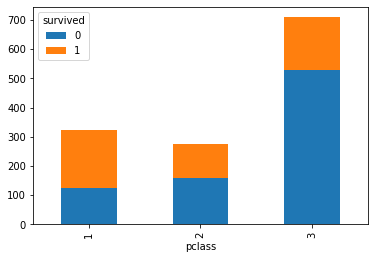

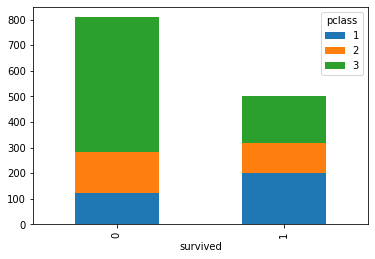

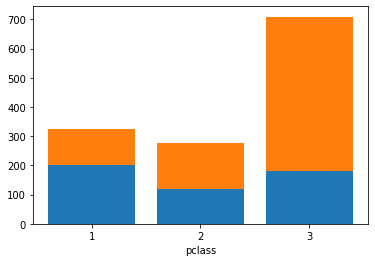

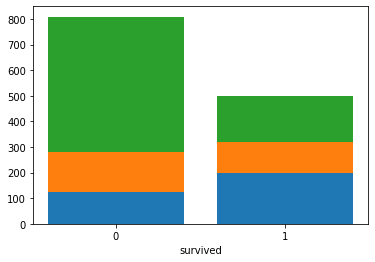

In [9]:
# plot stacked bar of survived with different pclass in same bar

#method1:
df.groupby(by=['pclass','survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

df.groupby(by=['survived','pclass']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

#method2:

df1=df[df.survived==1]
df2=df[df.survived==0]
y1=df1.pclass.value_counts()
y2=df2.pclass.value_counts()[y1.index]
plt.bar(y1.index,y1.values)
plt.bar(y2.index,y2.values,bottom=y1)
plt.xticks(y1.index) #or y2.index
plt.xlabel("pclass")
plt.show()
print()

df1=df[df.pclass==1]
df2=df[df.pclass==2]
df3=df[df.pclass==3]
y1=df1.survived.value_counts()
y2=df2.survived.value_counts()[y1.index]
y3=df3.survived.value_counts()[y2.index]
plt.bar(y1.index,y1.values)
plt.bar(y2.index,y2.values,bottom=y1.values)
plt.bar(y3.index,y3.values,bottom=y1.values+y2.values)
plt.xticks(y3.index)
plt.xlabel("survived")
plt.show()

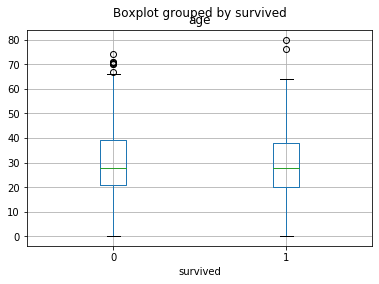

In [14]:
# plot box plot of ages of survived vs not-survived

    
df.boxplot(column=['age'], by = 'survived')
plt.show()



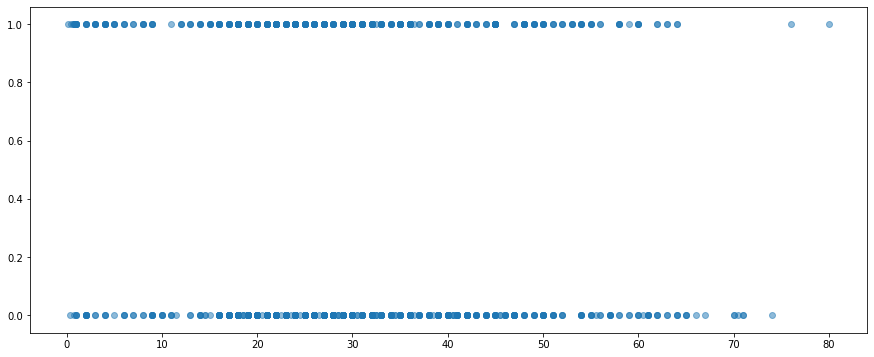

In [11]:
# plot scatter plot of ages vs survived.
plt.figure(figsize=(15,6))
plt.scatter(df.age,df.survived,alpha=0.5)
plt.show()